In [3]:
import torch
import torch.nn as nn
import torchvision


from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.MNIST(root='./data',train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=100,
                                          shuffle=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False, transform=transform,download = True)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=100,
                                         shuffle=False)
print(trainloader.__len__()*trainloader.batch_size, 'train samples')
print(testloader.__len__()*testloader.batch_size, 'test samples\n')
classes = ('zero' , 'one', 'two', 'three', 'four' , 'five' ,'six', 'seven' , 'eight' ,'nine')

60000 train samples
10000 test samples



torch.Size([100, 1, 28, 28]) torch.Size([100])
eight


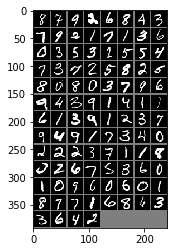

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images.size(), labels.size())
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))


In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # define all the components that will be used in the NN (these can be reused)
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3,stride = 1,padding = 1)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv3 = nn.Conv2d(20, 30, kernel_size=5)
        self.mp = nn.MaxPool2d(2, padding=0)
        self.drop2D = nn.Dropout2d(p=0.25, inplace=False)
        self.fc1 = nn.Linear(270,80)
        self.fc2 = nn.Linear(80,10)
        
    def forward(self, x):
        # define the acutal network
        
        
        # chain function together to form the layers
        x = F.relu(self.conv1(x))
        x = self.mp(x)
        x = self.conv2(x)
        x = F.relu(x)
      
        x = self.conv3(x)
        x = F.relu(x)
        x = self.mp(x)
        x = self.drop2D(x)
        x = x.view(-1 ,270) # flatten data, -1 is inferred from the other dimensions
        x = self.fc1(x)
        x = self.fc2(x)
        return F.log_softmax(x)

net = Net()
print(net)


Net(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(20, 30, kernel_size=(5, 5), stride=(1, 1))
  (mp): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2D): Dropout2d(p=0.25)
  (fc1): Linear(in_features=270, out_features=80, bias=True)
  (fc2): Linear(in_features=80, out_features=10, bias=True)
)


In [8]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's weights size
print(params[0][0,0])  # conv1's weights for the first filter's kernel

10
torch.Size([10, 1, 3, 3])
tensor([[-0.0043, -0.1945,  0.1202],
        [-0.1936,  0.1082, -0.2120],
        [ 0.1206,  0.2614,  0.0193]])


In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [10]:
for epoch in range(4):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
       

/home/valkyrie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Finished Training


GroundTruth:  seven   two   one  zero


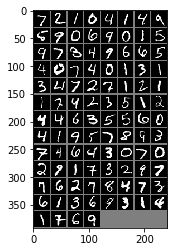

In [94]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [95]:
outputs = net(images)

/home/valkyrie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [96]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  seven   two   one  zero


In [97]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

/home/valkyrie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of the network on the 10000 test images: 96 %


In [98]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

/home/valkyrie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Accuracy of  zero : 100 %
Accuracy of   one : 100 %
Accuracy of   two : 95 %
Accuracy of three : 97 %
Accuracy of  four : 97 %
Accuracy of  five : 91 %
Accuracy of   six : 100 %
Accuracy of seven : 90 %
Accuracy of eight : 97 %
Accuracy of  nine : 90 %
